**Dataset description**: Fertilized corn crop in Nebraska.

Corn Trial conducted jointly with Dennis Francis and Jim Schepers, USDA-ARS, University of Nebraska, Lincoln, NE.  Corn trial located near Shelton, NE. Harvested in October, 2003

Source: <http://www.nue.okstate.edu/Nitrogen_Conference2003/Corn_Research.htm>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P


In [7]:
# Define auxiliary function for computing the root mean squared error (RMSE)
rmse_fn = lambda obs,pred: np.sqrt(np.mean((obs - pred)**2))


In [3]:
# Fit polynomial: Example using yield responses to nitrogen rates
yield_obs = [118, 165, 170, 193, 180, 181, 141, 177, 165, 197, 175] # Corn yield
nitrogen_obs =  [0, 89, 161, 165, 80, 160, 37, 105, 69, 123, 141]


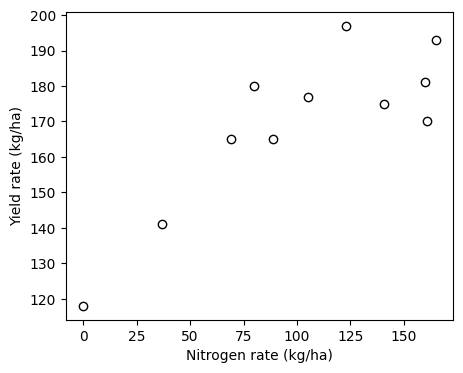

In [4]:
# Visualize field observations

plt.figure(figsize=(5,4))
plt.scatter(nitrogen_obs, yield_obs, facecolor='w', edgecolor='k')
plt.xlabel('Nitrogen rate (kg/ha)')
plt.ylabel('Yield rate (kg/ha)')
plt.show()


In [11]:
# Fit polynomial model
par = P.polyfit(nitrogen_obs, yield_obs, 2)
print(par)

# Use P.polyval? to access function help

[ 1.15569115e+02  9.61329119e-01 -3.41221057e-03]


In [10]:
# Compute fitting error

# Compute 
yield_pred = P.polyval(nitrogen_obs, par)

rmse = rmse_fn(yield_obs, yield_pred)
print(round(rmse,1),'kg/ha')

8.4 kg/ha


In [12]:
# Compute fitted curve
N_min = np.min(nitrogen_obs)
N_max = np.max(nitrogen_obs)

nitrogen_curve = np.linspace(N_min, N_max)
yield_curve = P.polyval(nitrogen_curve, par)


In [15]:
# Find index at which yield in the nitrogen curve is highest
idx_yield_max = np.argmax(yield_curve)

# Use the index to retrieve the optinal nitrogen rate at which yield is maximum
N_opt = nitrogen_curve[idx_yield_max]

# Find min and max yield
Y_max = np.max(yield_curve)
Y_min = np.min(yield_curve)

print(f'The optimal N rate is {N_opt:.1f} kg/ha')

The optimal N rate is 141.4 kg/ha


We can also find the optimal Nitrogen rate by approximating the first derivative of the function. Note that `np.diff()` will return an array that is one-element shorter.

```python
idx = np.argmin(np.abs(np.diff(yield_curve, 1)))
nitrogen_curve[idx+1]
```

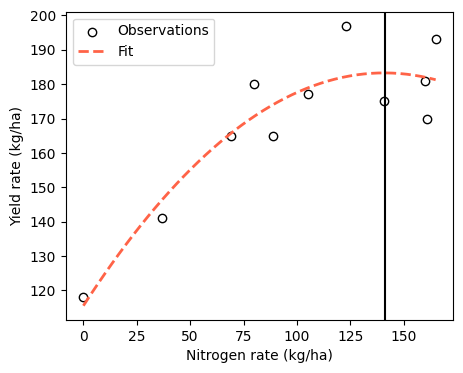

In [14]:
# Visualize field observations
plt.figure(figsize=(5,4))
plt.scatter(nitrogen_obs, yield_obs, facecolor='w', edgecolor='k', label='Observations')
plt.plot(nitrogen_curve, yield_curve, 
         color='tomato',linestyle='dashed', linewidth=2, label='Fit')

plt.axvline(N_opt, color='k')
plt.xlabel('Nitrogen rate (kg/ha)')
plt.ylabel('Yield rate (kg/ha)')
plt.legend()
plt.show()
